## EDA & Data Preprocessing on Google App Store Rating Dataset.

### 1. Import required libraries and read the dataset.

In [118]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# importing dataset

data1 = pd.read_csv('Apps_data.csv')


###  2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [119]:
print('First 5 samples\n\n ')
data1.head()






First 5 samples

 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [120]:
# to check the shape
data1.shape

# to display the shape of the dataset

(10841, 13)

In [121]:
# to check the information of the dataset
inf = data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [122]:
print("summary statistics of the data ")
data1.describe(include = 'all')



summary statistics of the data 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Check if there are any duplicate records in the dataset? if any drop them.


In [123]:
data1.duplicated().sum()  # thier were 483 duplicate valaues
data1.drop_duplicates(inplace=True)

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [124]:
data1.groupby('Category')['Category'].nunique().sum()
data1.isna().sum()  # to find any null values are present
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [125]:
data1['Rating'].isnull().sum()  #1465 missing values are present
data1.dropna(subset=['Rating'], inplace=True)
# data['Rating_category'] = data['Rating']


data1['Rating_category'] = data1['Rating'].apply(lambda i: 'High' if i > 3.5 else 'Low')
# data["Rating_category"] = np.where(data["Rating"] > 3.5, 'High', 'Low')
data1



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,0,159.0,1.910000e+08,10000.0,0,0.0,1,NaN,5.068904
1,0,967.0,1.410000e+08,500000.0,0,0.0,1,NaN,6.874198
2,0,87510.0,8.710000e+00,5000000.0,0,0.0,1,NaN,11.379508
3,0,215644.0,2.510000e+08,50000000.0,0,0.0,4,NaN,12.281384
4,0,967.0,2.810000e+00,100000.0,0,0.0,1,NaN,6.874198
...,...,...,...,...,...,...,...,...,...
10833,3,44.0,6.191000e+06,1000.0,0,0.0,1,NaN,3.784190
10834,11,7.0,2.610000e+00,500.0,0,0.0,1,NaN,1.945910
10836,11,38.0,5.310000e+08,5000.0,0,0.0,1,NaN,3.637586
10837,11,4.0,3.610000e+00,100.0,0,0.0,1,NaN,1.386294


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution

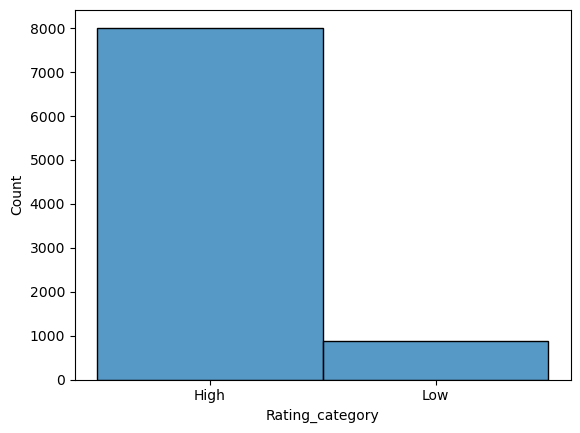

In [126]:
# df1_data1['Rating_category']

sns.histplot(x ='Rating_category', data = data1)

plt.show()


### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


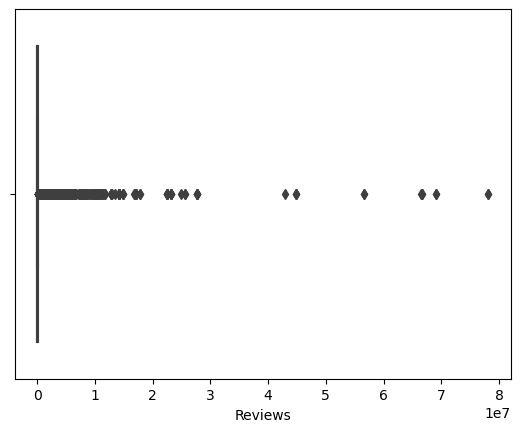

In [129]:
data1['Reviews'] = pd.to_numeric(data1['Reviews'], errors="coerce")

sns.boxplot(data1['Reviews'].dropna())
plt.show()

# their are outliers


In [128]:
# handle the outliers using a transformation approach.(Hint: Use log transformation)

import numpy as np
data1['Reviews_log'] = np.log(data1['Reviews'])
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.874198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High,1.945910
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High,3.637586
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High,1.386294
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High,4.736198


### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [131]:
# data = data.drop(data[data['Size'] == 'Varies with device'].index, inplace=True)
data1['Size'] = data1['Size'].replace({'M':'1000000', 'K':'1000', 'k':'1000'}, regex  = True)
# data_file

data1 = data1[data1['Size'] != 'Varies with device']
data1
data1['Size'] = data1['Size'].replace({'1,000+':'1000'})
data1['Size'] = pd.to_numeric(data1['Size'])
data1['Size'].dtype



C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\704388538.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Size'] = data1['Size'].replace({'1,000+':'1000'})
C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\704388538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Size'] = pd.to_numeric(data1['Size'])


dtype('float64')

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [133]:
data1['Installs'] = data1['Installs'].str.replace(',', '').str.replace('+', '')
data1['Installs'] = data1['Installs'].str.replace(r'\D', '')

C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\2368982710.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['Installs'] = data1['Installs'].str.replace(',', '').str.replace('+', '')
C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\2368982710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Installs'] = data1['Installs'].str.replace(',', '').str.replace('+', '')
C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\2368982710.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data1['Installs'] = data1['Installs']

In [134]:
data1['Installs'] = pd.to_numeric(data1['Installs'])


In [135]:
data1['Installs'].dtype

dtype('O')

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.


In [136]:
data1['Price'] = data1['Price'].str.replace('$', '').str.replace(',', '')

data1['Price'] = pd.to_numeric(data1['Price'], errors='coerce')
data1.dropna(inplace=True)

C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\2836912266.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['Price'] = data1['Price'].str.replace('$', '').str.replace(',', '')
C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\2836912266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Price'] = data1['Price'].str.replace('$', '').str.replace(',', '')
C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\2836912266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [137]:
data1['Price'].dtype

dtype('float64')

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [138]:
data1.drop(['App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)


C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\49344264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(['App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)


In [139]:
data1

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,ART_AND_DESIGN,159.0,1.910000e+08,10000,Free,0.0,Everyone,High,5.068904
1,ART_AND_DESIGN,967.0,1.410000e+08,500000,Free,0.0,Everyone,High,6.874198
2,ART_AND_DESIGN,87510.0,8.710000e+00,5000000,Free,0.0,Everyone,High,11.379508
3,ART_AND_DESIGN,215644.0,2.510000e+08,50000000,Free,0.0,Teen,High,12.281384
4,ART_AND_DESIGN,967.0,2.810000e+00,100000,Free,0.0,Everyone,High,6.874198
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,44.0,6.191000e+06,1000,Free,0.0,Everyone,High,3.784190
10834,FAMILY,7.0,2.610000e+00,500,Free,0.0,Everyone,High,1.945910
10836,FAMILY,38.0,5.310000e+08,5000,Free,0.0,Everyone,High,3.637586
10837,FAMILY,4.0,3.610000e+00,100,Free,0.0,Everyone,High,1.386294


### 13. Encode the categorical columns.

In [101]:
le = LabelEncoder()

data1['Category'] = le.fit_transform(df['Category'])
df['Type'] = le.fit_transform(df['Type'])
df['Content Rating'] = le.fit_transform(df['Content Rating'])
df

C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\3131411393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = le.fit_transform(df['Category'])
C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\3131411393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = le.fit_transform(df['Type'])
C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\3131411393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,0,159.0,1.910000e+08,10000.0,0,0.0,1,High,5.068904
1,0,967.0,1.410000e+08,500000.0,0,0.0,1,High,6.874198
2,0,87510.0,8.710000e+00,5000000.0,0,0.0,1,High,11.379508
3,0,215644.0,2.510000e+08,50000000.0,0,0.0,4,High,12.281384
4,0,967.0,2.810000e+00,100000.0,0,0.0,1,High,6.874198
...,...,...,...,...,...,...,...,...,...
10833,3,44.0,6.191000e+06,1000.0,0,0.0,1,High,3.784190
10834,11,7.0,2.610000e+00,500.0,0,0.0,1,High,1.945910
10836,11,38.0,5.310000e+08,5000.0,0,0.0,1,High,3.637586
10837,11,4.0,3.610000e+00,100.0,0,0.0,1,High,1.386294


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)


In [102]:
df['Rating_category'] = pd.to_numeric(df['Rating_category'],errors='coerce')


C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\340476835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating_category'] = pd.to_numeric(df['Rating_category'],errors='coerce')


In [47]:
# data1['Rating_category'] = data1['Rating_category'].astype(float)

C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_17220\1212839138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Rating_category'] = data1['Rating_category'].astype(float)


In [103]:


X = df['Rating_category'] 
y = df['Rating_category'] 


### 15. Split the dataset into train and test.


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 16. Standardize the data, so that the values are within a particular range.

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

X_test_scaled 



ValueError: Expected 2D array, got 1D array instead:
array=[nan nan nan ... nan nan nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.